## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [26]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la
import pandas as pd


## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [2]:
train = np.loadtxt('synth_train.txt')

test = np.loadtxt('synth_test.txt')

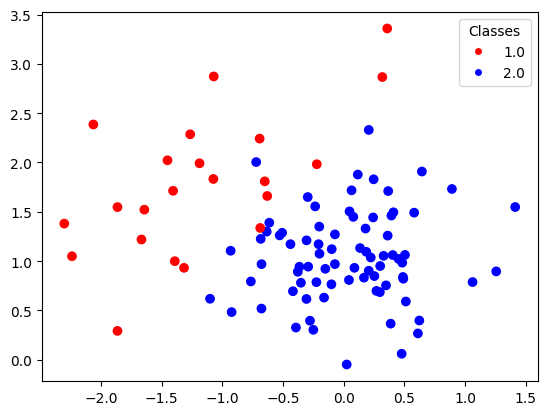

In [25]:
plt.figure()
class_colors = {1: 'red', 2: 'blue'}
plt.scatter(train[:,1], train[:,2],  c = [class_colors[label] for label in train[:,0]])


legend_labels = np.unique(train[:,0])
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=str(label),
                markerfacecolor=class_colors[label]) for label in legend_labels]

# Add the legend to the plot
plt.legend(handles=legend_handles, title="Classes")

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


In [39]:
train_df = pd.DataFrame(train).rename(columns={0:'class', 1: 'x', 2: 'y'})
train_df.head()

pk = (train_df['class'].value_counts().sort_index()/len(train)).values

mean = train_df.groupby('class').mean().values





array([[-1.18350693,  1.78655437],
       [ 0.02868973,  1.04424548]])

In [4]:
Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,3.5,Nx2)  # sampling of the x2 axis
[X1,X2]=np.meshgrid(x1,x2)  
x=np.hstack((X1.flatten('F'),X2.flatten('F'))) # list of the coordinates of points on the grid
#N = size(x,axis=0)

# Then compute the sampled prediction class_L for each couple (X1,X2)

In [ ]:
# For graphical representation  use code below for instance :
class_L = ...
plt.imshow(class_L, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)) )
plt.show()

## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...


